# 1. Yum, That Dish Tests Good
## To the lab for testing

**Hypotesis**

> **The mean of annual compensation of the population of data scientists is 110,000 usd.**

In [2]:
import pandas as pd

stack_overflow = pd.read_feather('stack_overflow.feather')
stack_overflow.sample()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
1094,25405.0,I am a developer by profession,Yes,22.0,14.0,adult,Yearly,90000.0,90000.0,United States,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",jQuery,jQuery;React.js,Just as welcome now as I felt last year,50.0,8.0,4.0,Under 30


**Point estimate**

In [3]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
mean_comp_samp

119574.71738168952

> The result is different from out hypotesis, but is it meaningfully different?

**Bootstrap distribution**


In [4]:
import numpy as np

# Step 3: Repeat steps 1 and 2 many times, appending to a list.
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2: Calculate point estimate
    np.mean(
        # Step 1. Resampling
        stack_overflow.sample(frac=1, replace=True)['converted_comp']
    )
)

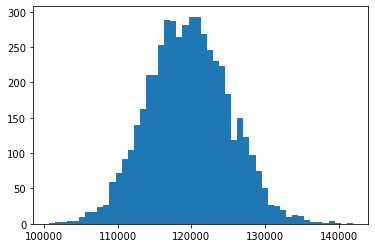

In [6]:
import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

> The bell shape means that it is roughly normally distributed.

**Standard error**

In [7]:
std_error = np.std(so_boot_distn, ddof=1)
std_error # Standard error of the bootstrap

5538.390917513913

**z-score**

Standarizing the values.

In [8]:
mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7287904599532036

**Hypotesis testing use case:**
> Determine whether sample statistic are close to or far away from expected (or "hypothesized" values)

> A/B testing lets you compare scenarios to see which best achieves some goal.

### Calculating the sample mean


In [9]:
late_shipments = pd.read_feather('late_shipments.feather')
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [11]:
# Calculate the proportion of late shipments
late_prop_samp = late_shipments['late'].value_counts(normalize=True)

# Print the results
late_prop_samp

No     0.939
Yes    0.061
Name: late, dtype: float64

In [13]:
late_shipments['late'].value_counts(normalize=True)[1]

0.061

> The proportion of late shipments in the sample is 0.061, or 6.1%.
### Calculating a z-score

**Hypothesis: The proportion of late shipments population is 6%.**

In [18]:
late_shipments['late_bool'] = late_shipments['late'].map({"Yes": 1, "No": 0})

In [22]:
# Step 3: Repeat steps 1 and 2 many times, appending to a list.
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
    # Step 2: Calculate point estimate
    np.mean(
        # Step 1. Resampling
        late_shipments.sample(frac=1, replace=True)['late_bool']
    )
)

In [25]:
late_prop_samp = late_shipments['late'].value_counts(normalize=True)[1]
late_prop_samp

0.061

In [26]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13111968748071778


> The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

## A tail of two z's

A **hypothesis** is a statement about an unknown population parameter.

A **hypothesis test** is a test of two competing hypothesis.

* The null hypothesis (**$H_0$**) is the existing data.

* The alternative hypothesis (**$H_A$**) is the "challenger" idea of the researcher.

Example:

**$H_0$**: The proportion of data scientists starting programming as children is 35%.

**$H_A$**: The proportion of data scientists starting programming as children is greater than 35%.

* Either **$H_A$** or **$H_0$** is true, not both.

* Initially, **$H_0$** is assumed to be true.

* The test ends in either "reject **$H_0$**" or "fail to reject **$H_0$**".

* If the evidence from the sample is "significant" that **$H_A$** is true, reject **$H_0$**, else choose **$H_0$**.


**Hypothesis tests check if the sample statistics lie in the tails of the null distribution.**

> Alternative _different_ from null ---> Two-Tailed

> Alternative _greater_ than null ---> Right-Tailed

> Alternative _less_ than null ---> Left-Tailed

The tails of the distribution that are relevant depend on whether the alternative hypothesis refers to "greater than", "less than", or "differences between."


**$H_A$: The proportion of data scientists starting programming as children is greater than 35%.** 

> **This is a RIGHT-TAILED test**


### p-values

**P-Value: probability of obtaining a result, assuming the null hypothesis is true.**

**Large p-value: Large support for **$H_0$****
> Statistic likely not in the tail of the null distribution.

**Small p-value: Strong evidence against **$H_0$**** (Close to zero)
> Statistic likely in the tail of the null distribution.

In [33]:
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_samp

0.39141972578505085

In [30]:
# Step 3: Repeat steps 1 and 2 many times, appending to a list.
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
    # Step 2: Calculate point estimate
    np.mean(
        # Step 1. Resampling
        stack_overflow.sample(frac=1, replace=True)['age_first_code_cut'] == 'child'
    )
)

In [32]:
prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)
std_error

0.01033695472955394

In [35]:
z_score = (prop_child_samp - prop_child_hyp) / std_error
z_score

4.0069562911627665

#### Calculating the p-value

> **Left-tailed test use: _norm.cdf()_**

> **Right-tailed test use: _1 - norm.cdf()_**

In [36]:
from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

3.075311995492935e-05

### Calculating p-values

The null hypothesis, **$H_0$**, is that the proportion of late shipments is 6%.

The alternative hypothesis, **$H_A$**, is that the proportion of late shipments is greater than 6%.


> **This is a RIGHT-TAILED test**


In [37]:
late_prop_hyp = 0.06

std_error = np.std(late_shipments_boot_distn, ddof=1)

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.4478403136296041


> The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

## Statistically significant other

**Significance level**: 
> The significance level of a hypothesis test (Alpha) is the threshold point for "beyond a reasonable doubt".

* Common values of alpha are `0.2`, `0.1`, `0.05`, and `0.01`.

* **If the p-value is less than or equal to alpha, we reject the null hypothesis. Otherwise, we fail to reject it.**

* **Alpha should be set prior to donducting the hypothesis test.**

In [38]:
alpha = 0.05

prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

p_value

3.075311995492935e-05

In [39]:
p_value <= alpha

True

> **We reject the null hypothesis.**

> **Reject $H_0$ in favor of $H_A$**

##### Confidence interval

For a significance level of alpha, it is common to choose a confidence level of `1 - alpha`.

* `alpha = 0.05` ----> `95%` confidence interval.

In [40]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
lower, upper

(0.37195931003980537, 0.41220698805838124)

**Support $H_A$ when $H_0$ was correct: False Positive.** **TYPE I error**

**Support $H_0$ when $H_A$ was correct: False Negative.** **TYPE II error**

_Example_

If p_value is less than or equal to alpha, we reject $H_0$

**False Positive Type I Error:** Data scientists did not start coding as children at a higher rate.


If p_value is greater than alpha, we fail to reject $H_0$

**False Negative Type II Error:** Data scientists started coding as children at a higher rate.


### Calculating a confidence interval


In [41]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.077)


> Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

> When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

> **ANSWER: Yes, since 0.06 is included in the 95% confidence interval and we failed to reject  due to a large p-value, the results are similar.**


**FALSE POSITIVE TYPE I ERROR:** 
**(We chose $H_A$)**

* **Rejecting the null hypothesis when in fact the null hypothesis is true.**

* **Finding the defendant guilty when in fact the defendant was INNOCENT.**

**FALSE NEGATIVE TYPE II ERROR:**
**(We chose $H_0$)**


* **Failing to reject the null hypothesis when in fact the null hypothesis is false.**

* **Finding the defendant not guilty when in fact the defendant DID COMMIT THE CRIME.**

# 2. Pass Me ANOVA Glass of Iced t
## Is this some kind of test statistic?

$H_0$: The mean compensation (in USD) is **the same** for those that coded first as a child and those that coded first as an adult.

**$$H_0: U_{child} = U_{adult}$$**

**$$H_0: U_{child} - U_{adult} = 0$$**

$H_A$: The mean compensation (in USD) is **greater** for those that coded first as a child and those that coded first as an adult.

**$$H_A: U_{child} > U_{adult}$$**

**$$H_A: U_{child} - U_{adult} > 0$$**

In [42]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

**$\bar{x}$ ----> A sample mean.**

> **$\bar{x}_{child}$ ---> Sample mean compensation for coding first as a child.**

> **$\bar{x}_{adult}$ ---> Sample mean compensation for coding first as a adult.**


**$\bar{x}_{child}$ - $\bar{x}_{adult}$ is a test statistic.** 

In [43]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [47]:
xbar_adult = xbar[0]
xbar_child = xbar[1]
xbar_adult, xbar_child

(111313.31104651163, 132419.5706214689)

In [44]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [48]:
s_adult = s[0]
s_child = s[1]
s_adult, s_child

(271546.5217287417, 255585.2401149758)

In [45]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [52]:
n_adult = n[0]
n_child = n[1]
n_adult, n_child

(1376, 885)

###### Calculating the test statistic

In [53]:
numerator = xbar_child - xbar_adult

denominator = np.sqrt(s_child ** 2 / n_child + n_adult ** 2 / n_adult)

t_stat = numerator / denominator
t_stat

2.4566489003820284

### Hypothesis testing workflow

1. Identify population parameter that is hypothesized about.

2. Specify the null and alternative hypothesis.

3. Determine (Standardized) test statistic and corresponding null distribution.

4. Conduct hypothesis test in python.

5. Measure evidence against the null hypothesis.

6. Make a decision comparing evidence to significance level.

7. Interpret the results in the context of the original problem.

### Two sample mean test statistic


In [56]:
xbar = late_shipments.groupby('late')['weight_kilograms'].mean()
xbar_no = xbar[0]
xbar_yes = xbar[1]

s = late_shipments.groupby('late')['weight_kilograms'].std()
s_no = s[0]
s_yes = s[1]

n = late_shipments.groupby('late')['weight_kilograms'].count()
n_no = n[0]
n_yes = n[1]

In [57]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)

# Calculate the test statistic
t_stat = numerator / denominator 

# Print the test statistic
print(t_stat)

-2.3936661778766433


> When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.
### Time for t

> **t-statistic follows a t-distribution.**

> Have a parameter named degrees of freedom, or df.

> Look like normal distributions, with fatter tails.


**Degrees of freedom** 

Larger degrees of freedom ---> **t-distribution gets closer to the normal distribution.**

Normal distribution ---> **t-distribution with infinite degrees of freedom.**


##### Calculating degrees of freedom

> Dataset has 5 independent observations.

> Four of the values are 2, 6, 8, 5.

> The sample mean is 5.

> **The last value must be 4:** There are 4 degrees of freedom.

$H_0$: The mean compensation (in USD) is **the same** for those that coded first as a child and those that coded first as an adult.

**$$H_0: U_{child} = U_{adult}$$**

**$$H_0: U_{child} - U_{adult} = 0$$**

$H_A$: The mean compensation (in USD) is **greater** for those that coded first as a child and those that coded first as an adult.

**$$H_A: U_{child} > U_{adult}$$**

**$$H_A: U_{child} - U_{adult} > 0$$**


**Significance level** 

alpha = 0.1

In [59]:
numerator = xbar_child - xbar_adult

denominator = np.sqrt(s_child ** 2 / n_child + n_adult ** 2 / n_adult)

t_stat = numerator / denominator
t_stat

2.4566489003820284

In [60]:
degrees_of_freedom = n_child + n_adult - 2
degrees_of_freedom

2259

#### Calculating p-values: two means from different groups

* **Use t-distribution CDF not normal CDF**

In [64]:
from scipy.stats import t

p_value = 1 - t.cdf(t_stat, df=degrees_of_freedom)
p_value

0.007049348179454573

In [65]:
alpha = 0.1
p_value < alpha

True

> This p-value is less than the significance level of 0.1. Then, we reject the null hypothesis in favor of the alternative hypothesis.

> Stack Overflow Data Scientist who started coding as children earn more.

**In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?**

ANSWER: When a sample standard deviation is used in estimating a standard error. We need to use a t-distribution when transforming the test statistic to get the p-value.


**The normal distribution is essentially a t-distribution with infinite degrees of freedom.**

### From t to p

Recall the hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.


In [68]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2
degrees_of_freedom

998

In [69]:
numerator = xbar_no - xbar_yes
denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)
t_stat = numerator / denominator 
t_stat

-2.3936661778766433

In [70]:
# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)
p_value

0.008432382146249523

In [71]:
alpha = 0.05
p_value < alpha

True

> **Reject the null hypothesis.**

> *When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.*

### Pairing is caring

**Was the percentage of Republican candidate votes lower in 2008 than 2012?**

**$$H_0: U_{2008} - U_{2012} = 0$$**
**$$H_A: U_{2008} - U_{2012} < 0$$**

$\alpha$ = 0.05 significance level

* **Data is paired** ---> Each voter percentage refers to the same county.
    * Want to capture voting pattern in model

In [93]:
sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


**New hypotheses**

**$$H_0: U_{diff} = 0$$**
**$$H_A: U_{diff} < 0$$**

_df_ = ${n}_{diff}$ - 1

In [84]:
n_diff = len(sample_data)
n_diff

100

In [85]:
s_diff = sample_data['diff'].std()
s_diff

4.955001433001608

In [86]:
t_stat = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)
t_stat

12.223022206163591

In [89]:
! pip install pingouin

     |████████████████████████████████| 185 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 927 kB 5.9 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=7c437c9fae77c78f689b7166b406f30f4fbeb2add82c9cc9b213a7311fc07f61
  Stored in directory: /Users/adrik/Library/Caches/pip/wheels/c0/9f/92/4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d452efd4b6e482e0cdd181494b19c471de3a0edc5d0e40d1fa249a6ba67618b3
  Stored in directory: /Users/adrik/Library/Caches/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1


In [91]:
sample_data

,state,county,dem_percent_12,dem_percent_16,diff
298,New York,New York,81.404893,86.556921,-5.152028
476,West Virginia,Raleigh,26.844497,21.753663,5.090834
194,Michigan,Arenac,46.792501,30.977131,15.815370
441,Texas,Smith,26.954435,26.307097,0.647338
236,Missouri,Barton,21.406196,13.386092,8.020104
...,...,...,...,...,...
440,Texas,Shelby,25.010771,19.348448,5.662323
343,Ohio,Ottawa,51.224617,37.289585,13.935032
140,Kansas,Atchison,38.462691,30.250951,8.211740
39,California,Tulare,41.297725,42.360283,-1.062558


In [111]:
pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'], paired=True, alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


###### When pairing needed?

> If you have repeated observations of something, then those observations form pairs.

### Visualizing the difference


In [95]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106832


In [96]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132316


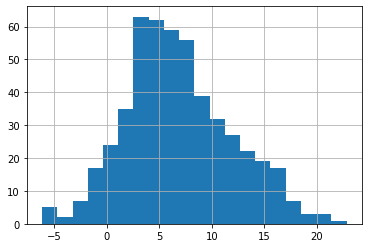

In [97]:
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

> Notice that the majority of the histogram lies to the right of zero.
### Using ttest()


In [102]:
import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative="two-sided")
                              
# Print the test results
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


> What's the correct decision from the t-test, assuming $\alpha$ = 0.01?

In [104]:
alpha = 0.01
test_results['p-val'] < alpha

T-test    True
Name: p-val, dtype: bool

> **Reject the null hypothesis.**

In [105]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'], paired=True, alternative="two-sided")
                           
# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


In [106]:
paired_test_results['p-val'] < alpha

T-test    True
Name: p-val, dtype: bool

> Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

## P-hacked to pieces
**Job satisfaction: 5 categories**

In [107]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

**Is mean annual compensation different for different levels of job satisfaction?**

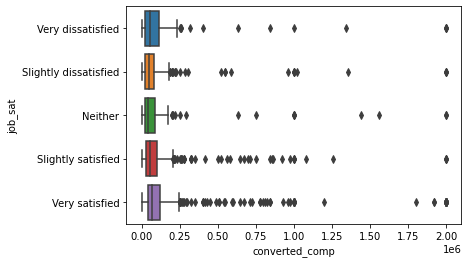

In [109]:
import seaborn as sns
sns.boxplot(x='converted_comp', y='job_sat', data=stack_overflow)
plt.show()

### Analysis of variance (ANOVA)


In [110]:
import pingouin
alpha = 0.2
pingouin.anova(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


##### Pairwise tests

1. $U_{very dissatisfied} \neq U_{slightly dissatisfied}$
2. $U_{very dissatisfied} \neq U_{neither}$
3. $U_{very dissatisfied} \neq U_{slightly satisfied}$
4. $U_{very dissatisfied} \neq U_{very satisfied}$
5. $U_{slightly dissatisfied} \neq U_{neither}$
6. $U_{slightly dissatisfied} \neq U_{slightly satisfied}$
7. $U_{slightly dissatisfied} \neq U_{very satisfied}$
8. $U_{neither} \neq U_{slightly satisfied}$
9. $U_{neither} \neq U_{very satisfied}$
10. $U_{slightly satisfied} \neq U_{very satisfied}$


> **We have 10 tests to perform**

In [114]:
pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


> **Look at the p-unc column: Three of these are less than our significance level of 0.2.**

> **With a significance level of 0.2, if we run 5 tests, the chance of a false positive result is 0.7.**

#### Bonferroni correction



In [115]:
pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


**padjust:** 
1. `'none'` (No correction)
2. `'bong'` (one-step Bonferroni correction)
3. `'sidak'`(one-step Sidak correction)
4. `'holm'` (step-down method using Bonferroni adjusments)
5. `'fdr_bh'` (Benjamini/Hochberg FDR correction)
6. `'fdr_by'` (Benjamini/Yekutieli FDR correction)

### Visualizing many categories


In [116]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
xbar_pack_by_mode

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64

In [117]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
s_pack_by_mode

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

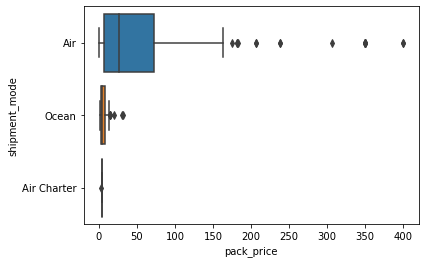

In [118]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y='shipment_mode', data=late_shipments)
plt.show()

> There certainly looks to be a difference in the pack price between each of the three shipment modes. Are there any differences are statistically significant?

### ANOVA

In [120]:
alpha = 0.1
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


In [121]:
anova_results['p-unc'] <= alpha

0    True
Name: p-unc, dtype: bool

> The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

**There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.**

### Pairwise t-tests

##### Without adjusments

In [122]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode', padjust='none') 

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


###### Modify the pairwise t-tests to use the Bonferroni p-value adjustment.


In [124]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                            dv="pack_price",
                                            between="shipment_mode",
                                            padjust="bonf")

pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


In [126]:
pairwise_results['p-unc'] < alpha

0    True
1    True
2    True
Name: p-unc, dtype: bool

> Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?

> **ANSWER: "Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".**

After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

# 3. Letting the Categoricals Out of the Bag
## Difference strokes for proportions, folks

##### Standardized test statistic for proportions.
$p$: Population proportion (Unknown population parameter)

$\hat{p}$: Sample proportion (Sample statistic)

${p}_{0}$: hypothesized population proportion

##### Why z distribution instead of t?

> t-distribution - fatter tails than a normal distribution.

> $\hat{p}$ only appears in the numerator, so z-scores is fine.

**Stack Overflow age categories**

$H_0$: Proportion of Stack Overflow users under thirty = 0.5

$H_A$: Proportion of Stack Overflow users under thirty $\neq$ 0.5

In [127]:
alpha = 0.01

stack_overflow['age_cat'].value_counts(normalize=True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [128]:
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
p_hat

0.5356037151702786

In [129]:
p_0 = 0.50 # According to the null hypotesis

n = len(stack_overflow)
n

2261

In [130]:
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
z_score

3.385911440783663

In [135]:
# Left-Tailed (Less than)
### norm.cdf(z_score)

# Right-Tailed (Greater than)
### 1 - norm.cdf(z_score)

# TWO-TAILED ("Not equal")
p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)
p_value

0.0007094227368100725

In [136]:
p_value = 2 * (1 - norm.cdf(z_score))
p_value

0.0007094227368100725

In [137]:
p_value <= alpha

True

> **We reject the null hypothesis, concluding that the proportion of users under thirty is no equal to 0.5**

**t for proportions?**

Some of the hypothesis tests in this course have used a  test statistic and some have used a  test statistic. To get the correct p-value, you need to use the right type of test statistic.

Do tests of proportion(s) use a  or a  test statistic and why?

**ANSWER: $z$: The test statistic for proportion(s) has only one estimate of a parameter instead of two.**

### Test for single proportions


In [138]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == 'Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [140]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


> While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

### A sense of proportion
##### Comparing two proportions

$H_0$: Proportion of hobbyist users is the same for those under thirty as those at least thirty.

$H_A$: Proportion of hobbyist users is different for those under thirty as those at least thirty.

**$$H_0: p_{>=30} - p_{<30} = 0$$**
**$$H_A: p_{>=30} - p_{<30} \neq 0$$**


###### Calculating the z score


In [153]:
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [159]:
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print(p_hat_at_least_30, p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [155]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [158]:
n_at_least_30 = n["At least 30"]
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

1050 1211


In [145]:
(p_hat_at_least_30, p_hat_under_30) * n

age_cat
At least 30     812.0
Under 30       1021.0
Name: hobbyist, dtype: float64

In [164]:
p_hat = ((n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30)) / (n_at_least_30 + n_under_30)

p_hat_times_not_p_hat = p_hat * (1 - p_hat)

p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / n_under_30 + p_hat_times_not_p_hat / n_at_least_30

std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

z_score = (p_hat_at_least_30 + p_hat_under_30) / std_error
z_score

97.85274022478792

#### Avoding all this math

In [150]:
age_by_hobbyist = stack_overflow.groupby('age_cat')['hobbyist'].value_counts()
age_by_hobbyist

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [151]:
from statsmodels.stats.proportion import proportions_ztest
alpha = 0.05

success_counts = np.array([812,1021])
n = np.array([812 + 238, 1021 + 190])

stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative='two-sided')
stat, p_value 

(-4.223691463320559, 2.403330142685068e-05)

### Test for two proportions


In [178]:
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)
p_hats

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: late, dtype: float64

In [179]:
ns = late_shipments.groupby('freight_cost_groups')['late'].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [181]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)


# Print p_value
print(p_value)

[0.99826466 0.00173534]


> You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

### proportions_ztest() for two samples


In [184]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


In [187]:
# Put the two "Yes" counts into an array
success_counts = np.array([45,16])

# Put the two group counts into an array
n = np.array([500 + 45, 439 + 16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative='larger')


# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


> statsmodels's .proportions_ztest() method gives the same results with less effort.

### Declaration of independence


In [190]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist', 
                                                       y='age_cat', correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


##### Declaring the hypothesis

$H_0$: Age categories are independent of job satisfaction levels

$H_A$: Age categories are NOT independent of job satisfaction levels

In [191]:
alpha = 0.1

In [192]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64

In [193]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<AxesSubplot:xlabel='job_sat'>

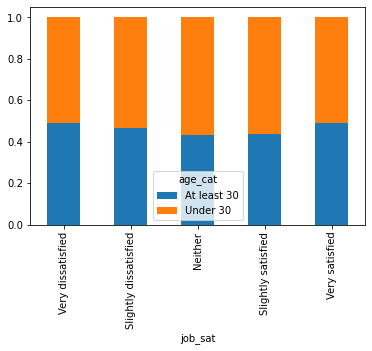

In [194]:
wide_props.plot(kind='bar', stacked=True)

In [195]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='job_sat', 
                                                       y='age_cat', correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


<AxesSubplot:xlabel='age_cat'>

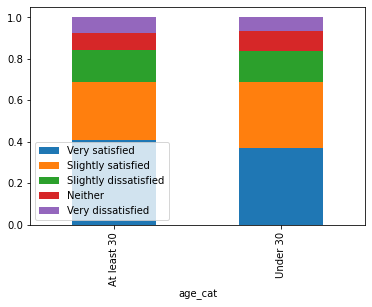

In [196]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [199]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='age_cat', 
                                                       y='job_sat', correction=False)
stats[stats['test'] == 'pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


> Variables are inpendent beacuse the result does not change.
### The chi-square distribution
**As you increase the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution.**

> Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.

#### How many tails for chi-square tests?

`pingouin.chi2_independence()` does not have an `alternative` argument to specify which tails are considered by the alternative hypothesis.

> **The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.**

### Chi-square test of independence


The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

`EXW`: "Ex works". The buyer pays for transportation of the goods.

`CIP`: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.

`DDP`: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.

`FCA`: "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

$H_0$: vendor_inco_term and freight_cost_group are independent.

$H_A$: vendor_inco_term and freight_cost_group are associated.

In [201]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Print props
props

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64

In [203]:
# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
wide_props

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,0.320000,0.680000
DDP,0.550000,0.450000
DDU,NaN,1.000000
EXW,0.583448,0.416552
FCA,0.336364,0.663636


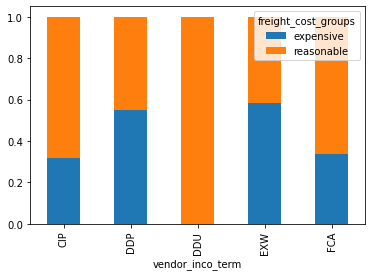

In [204]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [207]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='vendor_inco_term', 
                                                       y='freight_cost_groups', correction=False)

# Print results
stats[stats['test'] == 'pearson']

/opt/miniconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/opt/miniconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,34.805072,4.0,5.093922e-07,0.186561,0.999235


In [209]:
5.093922e-07 <= 0.01

True

> **Reject the null hypothesis and conclude that `vendor_inco_term` and `freight_cost_groups` are associated.**

The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

### Does this dress make my fit look good?


In [211]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [212]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n')
purple_link_counts

,purple_link,n
0,"Hello, old friend",1225
1,Indifferent,405
2,Amused,368
3,Annoyed,263


In [213]:
hypothesezed = pd.DataFrame({'purple_link': ['Hello, old friend', 'Amused', 'Indifferent', 'Annoyed'],
                             'prop': [1/2,1/6,1/6,1/6]})
hypothesezed

,purple_link,prop
0,"Hello, old friend",0.500000
1,Amused,0.166667
2,Indifferent,0.166667
3,Annoyed,0.166667


**$H_0$: The sample matches with the hypothesized distribution.**

**$H_A$: The sample does NOT match with the hypothesized distribution.**

In [214]:
n_total = len(stack_overflow)
hypothesezed['n'] = hypothesezed['prop'] * n_total
hypothesezed

,purple_link,prop,n
0,"Hello, old friend",0.500000,1130.500000
1,Amused,0.166667,376.833333
2,Indifferent,0.166667,376.833333
3,Annoyed,0.166667,376.833333


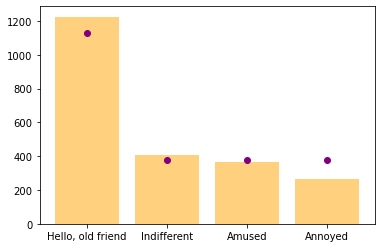

In [215]:
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='orange', alpha=0.5)

plt.scatter(hypothesezed['purple_link'], hypothesezed['n'], color='purple')
plt.show()

> Two bars are closer to the values we hypothesized and the other two are different.

In [216]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesezed['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

In [218]:
pvalue=1.1261810719413759e-09
pvalue <= alpha

True

> **We conclude that the sample distribution is different from the hypothesized distribution of proportions.**

### Visualizing goodness of fit


In [220]:
hypothesized = pd.DataFrame({'vendor_inco_term': {0: 'EXW', 1: 'CIP', 2: 'DDP', 3: 'FCA'},
 'prop': {0: 0.75, 1: 0.05, 2: 0.1, 3: 0.1}})
hypothesized

,vendor_inco_term,prop
0,EXW,0.75
1,CIP,0.05
2,DDP,0.10
3,FCA,0.10


In [243]:
incoterm_counts = pd.DataFrame({'vendor_inco_term': {0: 'EXW', 1: 'FCA', 2: 'DDP', 3: 'CIP'},'n': {0: 732, 1: 111, 2: 100, 3: 56}})
incoterm_counts

,vendor_inco_term,n
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


In [219]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

1000


In [230]:
# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,vendor_inco_term,prop,n
0,EXW,0.75,750.0
1,CIP,0.05,50.0
2,DDP,0.10,100.0
3,FCA,0.10,100.0


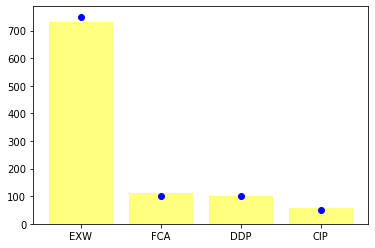

In [236]:
# Make a yellow bar graph of vendor_inco_term versus n
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="yellow", alpha=0.5)

# Add blue points for hypothesized counts
plt.scatter(hypothesized['vendor_inco_term'], hypothesized['n'], color='blue')
plt.show()

In [246]:
hypothesized.columns

Index(['vendor_inco_term', 'prop', 'n'], dtype='object')

In [247]:
# Perform a goodness of fit test on vendor_inco_term
chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.001001001001001001

In [249]:
pvalue = 2.6037864328450376e-20
alpha = 0.1
pvalue <= alpha

True

> Reject the null hypothesis and conclude that vendor_inco_term does not follow the distribution specified by hypothesized_props.

**The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.**

# 4. Time to Define the Relationship
## What do you assume?

### Randomness
**Assumtion**
> The samples are radom subsets of larger populations.

**Consecuence**
> Sample is not representative of population.

**How to check this**
> Understand how your data was collected.

> Speak to the data collector/domain expert.

### Idependence of variables
**Assumtion**
> Each observation or row in the data set is independent.

**Consecuence**
> Increase chance of false negative/positive errors.

**How to check this**
> Understand how our data was collected.


### Large sample size
**Assumtion**
> The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies.

**Consecuence**
> Wider confidence intervals.

> Increased chance of false negative/positive errors. 

**How to check this**
> It depends on the test.

### Sample size t-test

**One sample**

> $n >= 30$


**Two samples**

> $n_{1} >= 30, n_{2} >= 30$

**Paired samples**

> Number of rows in our data  $>= 30$

**ANOVA**

> $n_{i} >= 30$ for all values if "i"


### Sample size proportion tests

**One sample**

> **Number of successes in sample: $n * p >= 10$**
> **Number of failures in sample: $n * (1 - p) >= 10$**

**Two samples**

> **Number of successes in sample:** 

$n_{1} * \hat{p}_{1}>= 10$

$n_{2} * \hat{p}_{2}>= 10$
    
> **Number of failures in sample:** 

$n_{1} * (1 - \hat{p}_{1}) >= 10$

$n_{2} * (1 - \hat{p}_{2}) >= 10$


### Sample size: Chi-square tests

> **Number of successes in sample:** 

$n_{i} * \hat{p}_{i}>= 5$

> **Number of failures in sample:** 

$n_{i} * (1 - \hat{p}_{i}) >= 5$

### Sanity check 

> If the bootstrap distribution does NOT look normal, assumptions likely are not valid.

**Revisit the data collection to check for randomness, independence, and sample size.**

### Common assumptions of hypothesis tests

Hypothesis tests make assumptions about the dataset that they are testing, and the conclusions you draw from the test results are only valid if those assumptions hold. While some assumptions differ between types of test, others are common to all hypothesis tests.

**All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".**

### Testing sample size

#### two sample t-tests

In [250]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


#### one sample proportion test

In [ ]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

#### chi-square independence test.

In [254]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


#### ANOVA test.

In [255]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


> While randomness and independence of observations can't easily be tested programmatically, you can test that your sample sizes are big enough to make a hypothesis test appropriate. Based on the last result, we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.

## Assumptions not met


#### Parametic tests

> Assume a normal distribution

**z-test, t-test, ANOVA**


In [256]:
repub_votes_small = pd.read_feather('repub_votes_potus_08_12.feather')
repub_votes_small.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [260]:
alpha = 0.01

pingouin.ttest(x=repub_votes_small['repub_percent_08'], 
               y=repub_votes_small['repub_percent_12'], paired=True, alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


#### Non-Parametric tests

> Non-parametric tets use ranks of data.

In [262]:
x = [1,15,3,10,6]

from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

**Non-parametric tests are more reliable than parametric tests from small samples sizes and when data is not normally distributed.**
### Wilcoxon-signed rank test

#### Step 1

**Works on the ranked absolute differences between the pairs of data.**


In [270]:
repub_votes_small = repub_votes_small.sample(5)

In [271]:
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] - repub_votes_small['repub_percent_12']
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,87.0
23,Iowa,Appanoose,49.967617,50.616493,-0.648877,0.648877,13.0
52,New Mexico,Dona Ana,40.513857,41.133342,-0.619486,0.619486,11.0
83,Texas,Terrell,62.235067,64.504505,-2.269437,2.269437,43.0
47,Missouri,Putnam,68.020522,72.455608,-4.435087,4.435087,68.0


#### Step 2


In [272]:
repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,87.0
23,Iowa,Appanoose,49.967617,50.616493,-0.648877,0.648877,13.0
52,New Mexico,Dona Ana,40.513857,41.133342,-0.619486,0.619486,11.0
83,Texas,Terrell,62.235067,64.504505,-2.269437,2.269437,43.0
47,Missouri,Putnam,68.020522,72.455608,-4.435087,4.435087,68.0


#### Step 3

In [273]:
from scipy.stats import rankdata

repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,5.0
23,Iowa,Appanoose,49.967617,50.616493,-0.648877,0.648877,2.0
52,New Mexico,Dona Ana,40.513857,41.133342,-0.619486,0.619486,1.0
83,Texas,Terrell,62.235067,64.504505,-2.269437,2.269437,3.0
47,Missouri,Putnam,68.020522,72.455608,-4.435087,4.435087,4.0


#### Step 4

In [267]:
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0

W = np.min([T_minus, T_plus])
W

0

In [274]:
alpha = 0.01
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'], y=repub_votes_small['repub_percent_12'],
                 alternative='less')


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.6


In [276]:
0.03125 <= alpha

False

> Fail to reject $H_{0}$, since p value  > alpha

**Which test is a parametric equivalent to the Wilcoxon signed-rank test?**

**Paired t-test**
### Wilcoxon signed-rank test
##### paired t-test

In [279]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], paired=True, alternative="greater") 




# Print paired t-test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,greater,1.800317e-115,"[6.46, inf]",0.454202,4.491e+111,1.0


##### Wilcoxon-signed rank test

In [281]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'],
                 alternative='greater')



# Print Wilcoxon test results
wilcoxon_test_results

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,122849.0,greater,8.901980e-78,0.961661,0.644816


> **Given the large sample size (500), we obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.**

### Wilcoxon-Mann-Whitney test
**Similar to Wilcoxon-signed rank test but works on unpaired data.**

In [283]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp.head()

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult


In [285]:
age_cs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')
age_cs_comp_wide.head()

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN


In [288]:
alpha = 0.01

pingouin.mwu(x=age_cs_comp_wide['child'], y=age_cs_comp_wide['adult'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


### Kruskal-Wallis test

**Tests as ANOVA is to t-test**

In [289]:
pingouin.kruskal(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


### Wilcoxon-Mann-Whitney


In [291]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'], y=weight_vs_late_wide['Yes'], alternative='two-sided')


# Print the test resultsc
wmw_test

,U-val,alternative,p-val,RBC,CLES
MWU,19134.0,two-sided,0.000014,0.331902,0.334049


> The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

### Kruskal-Wallis


In [292]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between='shipment_mode')

# Print the results
kw_test

,Source,ddof1,H,p-unc
Kruskal,shipment_mode,2,125.096618,6.848799e-28


> The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.